In [85]:
## Import the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings ('ignore')


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE & Liner regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [86]:
#loading data
Leads = pd.read_csv("Leads.csv")

In [87]:
## Look at the head of the dataset
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [88]:
## Basic info of dataset
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [89]:
## Look at the missing values in the dataset

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [90]:
## The columns Asymmetrique Activity Index/ Profile Index/ Activity Score/ Profile Score has about 50% data missing
## Need to drop the columns as the data may also be interpreted by other columns

Leads.drop (['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], inplace=True, axis=1)


Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Ringing,Not Sure,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,No,No,Modified


In [91]:
## Also Leads Quality has about half missing values, dropping the same. This column contains data based on intution of sales rep

Leads.drop ('Lead Quality', inplace=True, axis=1)

Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


In [92]:
## Recheck info of the data frame

Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [93]:
##Next deal with the data with more tahn 1000 missing records

Leads[['Country','Tags','Lead Profile','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','City']]


,Country,Tags,Lead Profile,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,City
0,NaN,Interested in other courses,Select,Select,Select,Unemployed,Better Career Prospects,Select
1,India,Ringing,Select,Select,Select,Unemployed,Better Career Prospects,Select
2,India,Will revert after reading the email,Potential Lead,Business Administration,Select,Student,Better Career Prospects,Mumbai
3,India,Ringing,Select,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Mumbai
4,India,Will revert after reading the email,Select,Select,Other,Unemployed,Better Career Prospects,Mumbai
...,...,...,...,...,...,...,...,...
9235,Saudi Arabia,Will revert after reading the email,Potential Lead,IT Projects Management,Select,Unemployed,Better Career Prospects,Mumbai
9236,India,wrong number given,Potential Lead,Media and Advertising,Select,Unemployed,Better Career Prospects,Mumbai
9237,India,invalid number,Potential Lead,Business Administration,Select,Unemployed,Better Career Prospects,Mumbai
9238,India,NaN,NaN,Human Resource Management,Online Search,NaN,NaN,Other Metro Cities


In [94]:
## Look at each column seperately

Leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Netherlands                2
Ghana                      2
Italy                      2
Belgium                    2
China                      2
Uganda                     2
Asia/Pacific Region        2
Kenya                      1
Malaysia                   1
Russia                     1
Denmark                    1
Vietnam                    1
Indonesia                  1
Switzerland   

In [95]:
## Can replace missing values with mode (in this case India)

## Look at the column 'Tags'

Leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [96]:
## Tags seem to be an important indicator, however a lot of records are missing in this column. This suggests that the 
## data was unavailable for a lot of records
Leads['Tags'].isnull().sum()/Leads['Tags'].shape[0]

0.36287878787878786

In [97]:
## In this case we cannot impute any values, we can however setermine the status or probability by other independent variables
## We would drop the column as of now and move ahead

In [98]:
## Next we study Lead Profile
#2709 missing values, total 6855 missing values
Leads['Lead Profile'].value_counts()
#Leads['Lead Profile'].isnull().sum()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [99]:
## This column has 2709 missing values, however the values Select can also be categorized as missing as it does not carry any sense
## we need to drop the column in this case

In [100]:
## Let's study Specialization 
## 1438 misssing values, total 3380 records are missing
Leads['Specialization'].value_counts()
#Leads['Specialization'].isnull().sum()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [101]:
## Will look into the dataset further to take decision later
## 2207 missing values
Leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [102]:
## Will look into the dataset further to take decision later
## 2690 missing values
Leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [103]:
## What matters most to you in choosing a course
## 2709 missing values
Leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [104]:
## City
## 1420 missing values, 3669 missing values
Leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [105]:
## Drop columns 'Tags','Lead Profile','Specialization','How did you hear about X Education','What is your current occupation','City'

Leads.drop (['Tags','Lead Profile','Specialization','How did you hear about X Education','City'],axis=1,inplace=True)

In [106]:
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [107]:
## Fill missing values in Country with India

## Look at other angle of dealing with country

Leads[(Leads['Country'] != 'India')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,No,No,No,No,No,No,No,No,Email Bounced
16,3abb7c77-1634-4083-9a9f-861068220611,660540,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9217,b8872c12-7534-498d-8f4a-e79a19516db1,579786,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
9225,787ab5f4-6f09-41c0-b083-55521ca23f8a,579744,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,74,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9226,c3bb1471-53d5-4244-b2e5-4bbb543835c1,579735,API,Olark Chat,No,No,0,0.0,0,0.00,...,No,No,No,No,No,No,No,No,No,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam


In [108]:
## Out of 2748 values, 2461 are null, thus very few countries are outside india, precisely only 287, means only 3% of data

## If we impute India as missing values, then majority data would only be India and thus column would add no significance to analysis

## Similar is case with 'What matters most to you in choosing a course' where everything is Better Career prospects

## We may drop both these Columns, and assume all entries from India & Better Career Prospects

## Also we would drop the rows where Country is not India

Leads['Country'].fillna ('India',inplace = True)
Leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Nigeria                    4
South Africa               4
Germany                    4
Canada                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Netherlands                2
Ghana                      2
Italy                      2
Belgium                    2
China                      2
Uganda                     2
Asia/Pacific Region        2
Kenya                      1
Malaysia                   1
Russia                     1
Denmark                    1
Vietnam                    1
Indonesia                  1
Switzerland   

In [109]:
## Look at conversion rate in other countries
Leads[(Leads['Country']!='India')]['Converted'].sum()

84

In [110]:
Leads[(Leads['Country']!='India')]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
14,a8531c22-fcf1-48f8-a711-fb5abf98ad87,660553,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,481,1.00,...,No,No,No,No,No,No,No,No,No,Email Bounced
87,0fc49a08-63d2-4fef-98c1-244bfd6d12a9,659644,Landing Page Submission,Direct Traffic,No,No,0,6.0,97,3.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
103,95f1c454-9f9a-40ef-b521-6fc791f103fb,659469,Landing Page Submission,Direct Traffic,No,No,0,2.0,638,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
207,fad4be87-d418-4746-b951-cd405a98b631,658288,API,Organic Search,No,No,0,5.0,358,5.00,...,No,No,No,No,No,No,No,No,No,Modified
243,2de32d4e-8972-4fca-a8cc-93c1f8b30d23,657902,API,Olark Chat,No,No,0,7.0,1130,2.33,...,No,No,No,No,No,No,No,No,Yes,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,3e483954-1508-4b8b-9534-59f8a2a2dc6b,580353,Landing Page Submission,Organic Search,No,No,0,5.0,255,5.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9173,83cb9ffe-39e8-4b68-bb13-e3be447d4586,580104,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,53,1.00,...,No,No,No,No,No,No,No,No,No,Modified
9225,787ab5f4-6f09-41c0-b083-55521ca23f8a,579744,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,74,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,...,No,No,No,No,No,No,No,No,No,Email Marked Spam


In [111]:
Leads = Leads [(Leads['Country'] == 'India')]
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [112]:
## Drop Country & What matters most to you in choosing a course columns

Leads.drop(['Country', 'What matters most to you in choosing a course'], axis=1, inplace = True)
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [113]:
## What is your current occupation column

Leads['What is your current occupation'].fillna('Unemployed',inplace=True)
Leads['What is your current occupation'].value_counts()

Unemployed              8028
Working Professional     684
Student                  208
Other                     16
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [114]:
Leads.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content       

In [115]:
## Look at columns Lead Source, TotalVisits, Page Views Per Visit, Last Activity

Leads['Lead Source'].value_counts()

Google               2830
Direct Traffic       2363
Olark Chat           1748
Organic Search       1104
Reference             533
Welingak Website      142
Referral Sites        116
Facebook               54
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [116]:
## Some datacleaning which may be done in this columns, google to be replaced with Google, delete null value rows
## also delete sorces with very less values starting from bing, click2call etc.
Leads['Lead Source'] = Leads['Lead Source'].replace(['google'],'Google')
Leads['Lead Source'].value_counts()

Google               2835
Direct Traffic       2363
Olark Chat           1748
Organic Search       1104
Reference             533
Welingak Website      142
Referral Sites        116
Facebook               54
bing                    6
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
welearnblog_Home        1
Pay per Click Ads       1
blog                    1
WeLearn                 1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [118]:
## REMOVING NULL VALUES AND LOW COUNT SOURCES FROM DATA

Leads = Leads[(Leads['Lead Source'].isin (['Google','Direct Traffic','Olark Chat','Organic Search','Reference','Welingak Website','Referral Sites','Facebook']))]
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [125]:
## TotalVisits & Page Views Per Visit both have 137 values missing

Leads_NOVISIT = Leads[Leads['TotalVisits'].isnull()]

## As expected both these column values are Null in these cases

#Leads['TotalVisits'].value_counts()

## 97 of 130 have converted in this case which is really high, we cannot directly delete these records

## At the moment let us store this dataframe seperately and move ahead 

Leads_NOVISIT

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
77,895d4905-f534-4f18-915b-8d239a72b5dc,659722,Lead Add Form,Welingak Website,No,No,1,NaN,1096,NaN,...,No,No,No,No,No,No,No,No,No,Modified
79,3a0ce10f-d2c1-4213-a2bc-4f97bcd29699,659710,Lead Add Form,Reference,No,No,1,NaN,705,NaN,...,No,No,No,No,No,No,No,No,No,Modified
81,277ad6a6-4565-4a18-a1ff-e46e03f22663,659705,Lead Add Form,Welingak Website,No,No,1,NaN,346,NaN,...,No,No,No,No,No,No,No,No,No,Modified
88,68f496c2-0073-470f-9c3c-7fb48f060ce5,659631,Lead Add Form,Reference,No,No,1,NaN,1007,NaN,...,No,No,No,No,No,No,No,No,No,Modified
120,144807db-2895-4002-b52e-3eda79c22395,659283,Lead Add Form,Reference,No,No,1,NaN,1111,NaN,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8097,82f3035c-0750-4f09-a0cc-4288abb88042,587973,Lead Add Form,Reference,No,No,0,NaN,1201,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8107,7e66be45-783c-4983-b4cd-c6594bbbeee8,587916,Lead Add Form,Reference,No,No,1,NaN,903,NaN,...,No,No,No,No,No,No,No,No,No,Modified
8434,f5be8a84-bfa2-46a6-816a-af81a45ea6b9,585438,Lead Add Form,Reference,No,No,1,NaN,1458,NaN,...,No,No,No,No,No,No,No,No,No,Modified
9015,5857eeef-41cb-4523-a654-8709f6c8d8c6,581257,Lead Add Form,Reference,No,No,1,NaN,1159,NaN,...,No,No,No,No,No,No,No,No,No,Modified


In [136]:
## Drop null values rows

Leads.dropna(subset=['TotalVisits'],inplace=True)

Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [137]:
Leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content         

In [143]:
## NOW THE DATASET IS FREE OF NULL VALUES
## NEXT WE WOULD HANDLE OUTLIERS, Also we would convert Yes to 1 & No to 0

num_Leads = Leads[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']]
num_Leads.describe (percentiles=[0.25,0.5,0.75,0.9,0.95,0.995])

,Total Time Spent on Website,TotalVisits,Page Views Per Visit
count,8765.000000,8765.000000,8765.000000
mean,480.155163,3.435938,2.353684
std,545.893697,4.900648,2.163578
min,0.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000
50%,241.000000,3.000000,2.000000
75%,920.000000,5.000000,3.250000
90%,1372.600000,7.000000,5.000000
95%,1557.000000,10.000000,6.000000
99.5%,1926.260000,21.000000,11.000000


In [145]:
## Clearly there are outliers in data, Let's segggregate that portion of the data

Leads_TV = Leads[(Leads['TotalVisits']>21)]
Leads_TV

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,...,No,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,...,No,No,No,No,No,No,No,No,No,Olark Chat Conversation
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2322,272696ed-4aff-4b42-8829-b63f122493d9,637257,Landing Page Submission,Direct Traffic,Yes,No,0,141.0,755,6.71,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2323,342dae00-4302-4c63-a891-7fc61ff0ea15,637256,API,Direct Traffic,No,No,0,25.0,67,3.57,...,No,No,No,No,No,No,No,No,No,Page Visited on Website
2563,ce04a5a0-e2ad-4281-9b8f-32ad6b184a80,634882,Landing Page Submission,Direct Traffic,No,No,0,27.0,386,5.40,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
2861,dc888c15-9a7b-42f0-9843-3a989033071f,632239,Landing Page Submission,Organic Search,No,No,0,29.0,209,2.90,...,No,No,No,No,No,No,No,No,Yes,Modified


In [146]:
## Page Views per visit
Leads_PV = Leads[(Leads['Page Views Per Visit']>11)]
Leads_PV

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
56,59e722da-edff-43d9-af61-f5c8bcc986c4,659998,Landing Page Submission,Referral Sites,No,No,1,13.0,436,13.00,...,No,No,No,No,No,No,No,No,No,Modified
125,46921843-bfc8-443d-96f8-18495891aef6,659241,API,Referral Sites,No,No,0,16.0,53,16.00,...,No,No,No,No,No,No,No,No,No,Modified
168,ba13e654-406e-4d3f-9fc1-0803087a41eb,658756,Landing Page Submission,Referral Sites,No,No,0,12.0,493,12.00,...,No,No,No,No,No,No,No,No,Yes,Email Link Clicked
246,e15342a3-ca98-4401-8a76-a7ff920546c7,657882,API,Referral Sites,No,No,0,14.0,354,14.00,...,No,No,No,No,No,No,No,No,No,Modified
292,4beec5ec-bdea-4ecd-ab89-345060e38bc2,657316,Landing Page Submission,Direct Traffic,No,No,0,13.0,194,13.00,...,No,No,No,No,No,No,No,No,Yes,Email Opened
387,23911ee3-0be8-4985-9ef6-a372791eecf0,656382,Landing Page Submission,Google,No,No,0,15.0,753,15.00,...,No,No,No,No,No,No,No,No,Yes,Modified
579,eda6996c-7d0b-46ce-ad60-f2ee9c85c148,654278,API,Organic Search,No,No,0,13.0,99,13.00,...,No,No,No,No,No,No,No,No,No,Modified
1697,7211d363-f4e7-4d36-b2f5-7ba34c502062,642886,API,Google,No,No,0,14.0,148,14.00,...,No,No,No,No,No,No,No,No,No,Email Opened
2190,0e4c0711-6cb5-455d-8e0d-7f9f2cc4f895,638668,Landing Page Submission,Direct Traffic,Yes,No,0,55.0,297,55.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2950,83c10034-a3e5-4836-b5b5-d9068ef237cc,631467,Landing Page Submission,Google,No,No,1,14.0,17,14.00,...,No,No,No,No,No,No,No,No,Yes,Modified


In [147]:
## Total Time Spent on Website
Leads_TT = Leads[(Leads['Total Time Spent on Website']>1927)]
Leads_TT

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
170,e70118b9-8fc8-4810-b665-3551a60813ef,658714,API,Referral Sites,No,No,0,2.0,1944,2.00,...,No,No,No,No,No,No,No,No,No,Email Opened
211,f942f0fe-55e2-4e23-bae8-346c55278fb0,658264,Landing Page Submission,Direct Traffic,No,No,1,9.0,1953,1.80,...,No,No,No,No,No,No,No,No,No,Modified
337,360558c9-5f2d-4244-8984-a4b5c34bfcf9,656859,Landing Page Submission,Google,No,No,0,7.0,1939,2.33,...,No,No,No,No,No,No,No,No,No,Email Opened
819,638fecaf-4479-4dd0-8785-cfb9e492d817,651807,Landing Page Submission,Google,No,No,1,11.0,2069,5.50,...,No,No,No,No,No,No,No,No,Yes,Email Opened
892,4377b169-87ec-484c-abf8-c06b3ec21e65,650918,Landing Page Submission,Google,No,No,1,6.0,1966,6.00,...,No,No,No,No,No,No,No,No,No,Email Opened
982,d1b54285-80f1-4feb-8947-14d03cdc2c56,649691,Landing Page Submission,Google,No,No,1,3.0,1995,3.00,...,No,No,No,No,No,No,No,No,No,Modified
1454,2c2de880-420f-4ff8-a0e5-b1ae22006258,644906,Landing Page Submission,Google,No,No,1,6.0,1975,6.00,...,No,No,No,No,No,No,No,No,No,Email Link Clicked
1534,712e84ad-8afc-41ff-8631-7fdd0a7d669e,644111,API,Organic Search,No,No,0,2.0,1978,2.00,...,No,No,No,No,No,No,No,No,No,Modified
1675,264b9c84-e4f6-45e9-9caa-93aa4ed8facc,643053,Landing Page Submission,Google,No,No,1,8.0,2137,8.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
1739,3a9bdbef-856b-4d92-bc31-c78a6a03b4ab,642452,Landing Page Submission,Direct Traffic,No,No,1,2.0,1948,2.00,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [148]:
High_VISIT_FINAL = pd.concat([Leads_TV,Leads_PV,Leads_TT],axis=0)
High_VISIT_FINAL

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
469,5e2436a2-a011-4ac6-8165-b7300cc81fd4,655360,Landing Page Submission,Organic Search,No,No,0,22.0,59,5.50,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1160,424e4ffd-efc9-4dc8-8cd2-5cf3b3e56223,647818,Landing Page Submission,Direct Traffic,No,No,0,43.0,57,3.91,...,No,No,No,No,No,No,No,No,No,Email Opened
1741,15400e7f-1771-4440-864e-7b229132c3b2,642439,Landing Page Submission,Direct Traffic,Yes,No,0,22.0,601,1.38,...,No,No,No,No,No,No,No,No,Yes,Page Visited on Website
1824,8fe92f1a-1d93-472e-9ab3-91d0d9ac4f62,641781,Landing Page Submission,Direct Traffic,No,No,0,30.0,68,10.00,...,No,No,No,No,No,No,No,No,Yes,Modified
2154,b6fa82dc-e10b-4f8a-ba5c-575c17d97024,639121,API,Olark Chat,No,No,1,23.0,1677,2.09,...,No,No,No,No,No,No,No,No,No,Olark Chat Conversation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8745,3441441c-4cb1-4acd-b7b4-9dda679a30d9,583083,API,Organic Search,No,No,1,3.0,2253,3.00,...,No,No,No,No,No,No,No,No,No,Email Opened
8787,05a31293-dc3c-4791-b560-3079791b955d,582776,API,Google,No,No,1,2.0,2170,1.00,...,No,No,No,No,No,No,No,No,No,SMS Sent
9026,0d8d21f9-43a6-4bd8-a185-e53457dc3329,581165,Landing Page Submission,Direct Traffic,No,No,0,2.0,1982,2.00,...,No,No,No,No,No,No,No,No,Yes,Modified
9108,6e2bb2ce-9e9c-438e-be09-3ffda8537f61,580548,Landing Page Submission,Organic Search,No,No,0,4.0,1965,4.00,...,No,No,No,No,No,No,No,No,No,SMS Sent


In [149]:
## As we have seperated this dataframe, we would remove these from our master dataframe
Leads = Leads.drop(index=High_VISIT_FINAL.index)
Leads

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9233,3f715465-2546-47cd-afa8-8b8dc63b8b43,579622,API,Direct Traffic,No,No,1,13.0,1409,2.6,...,No,No,No,No,No,No,No,No,No,SMS Sent
9234,c0b25922-511f-4c56-852e-ced210a45447,579615,Landing Page Submission,Direct Traffic,No,No,1,5.0,210,2.5,...,No,No,No,No,No,No,No,No,No,Modified
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.0,...,No,No,No,No,No,No,No,No,Yes,SMS Sent


In [150]:
## Replace all Yes with 1 & No with 0 in entire dataframe
Leads.replace(to_replace='No', value=0,inplace = True)
Leads.replace(to_replace='Yes', value=1, inplace= True)
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,0,0,0,Modified


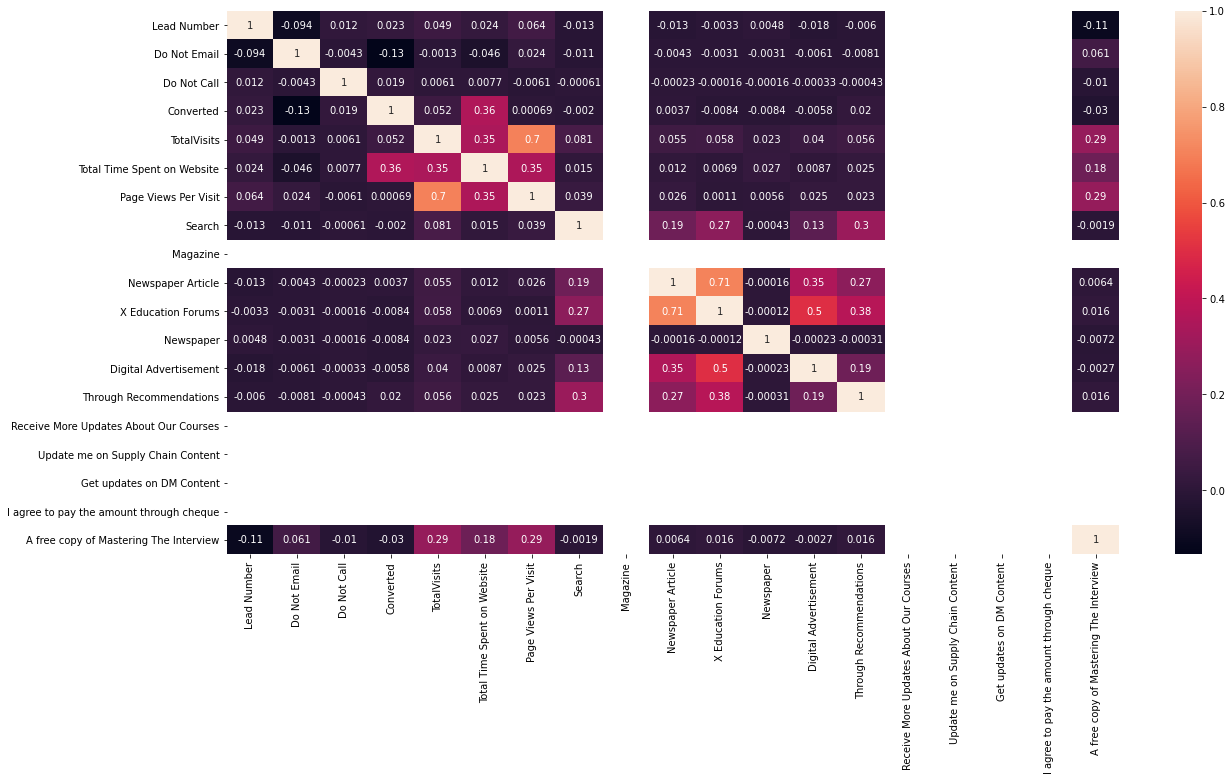

In [151]:
## CORRELATION MATRIX - ## DO NOT READ
plt.figure (figsize=(20,10))
sns.heatmap(Leads.corr(),annot= True)
plt.show()

In [152]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8657 entries, 0 to 9238
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               8657 non-null   object 
 1   Lead Number                               8657 non-null   int64  
 2   Lead Origin                               8657 non-null   object 
 3   Lead Source                               8657 non-null   object 
 4   Do Not Email                              8657 non-null   int64  
 5   Do Not Call                               8657 non-null   int64  
 6   Converted                                 8657 non-null   int64  
 7   TotalVisits                               8657 non-null   float64
 8   Total Time Spent on Website               8657 non-null   int64  
 9   Page Views Per Visit                      8657 non-null   float64
 10  Last Activity                       

In [155]:
## Create Dummies for objects
Lead_Objects = ['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity']
Leads[Lead_Objects]

,Lead Origin,Lead Source,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,Unemployed,Modified
...,...,...,...,...,...
9233,API,Direct Traffic,SMS Sent,Unemployed,SMS Sent
9234,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,Modified
9236,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,SMS Sent
9237,Landing Page Submission,Direct Traffic,SMS Sent,Unemployed,SMS Sent


In [156]:
## Create dummies

Lead_Origin = pd.get_dummies(Leads['Lead Origin'],drop_first = True)
Lead_Source = pd.get_dummies(Leads['Lead Source'],drop_first = True)
Last_Activity = pd.get_dummies(Leads['Last Activity'],drop_first = True)
Occupation = pd.get_dummies(Leads['What is your current occupation'],drop_first = True)
LastActivity = pd.get_dummies(Leads['Last Notable Activity'],drop_first = True)

In [157]:
## MERGE THE DUMMIES

Leads = pd.concat ([Leads,Lead_Origin,Lead_Source,Last_Activity,Occupation,LastActivity],axis=1)

## Delete columns whose dummy variables have been created
Leads = Leads.drop(['Lead Origin','Lead Source','Last Activity','What is your current occupation','Last Notable Activity'],axis=1)
Leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [208]:
## Data preprocessing steps for building LR model

X = Leads.drop(['Prospect ID','Lead Number','Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [209]:
# y of the dataset
y = Leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [210]:
## Test train split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [211]:
## SCaling the nukmeric variables

scaler = StandardScaler()

## Scaling the data
X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']] = scaler.fit_transform(X_train[['Total Time Spent on Website','TotalVisits','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,...,Form Submitted on Website,Had a Phone Conversation,Modified,Olark Chat Conversation,Page Visited on Website,Resubscribed to emails,SMS Sent,Unreachable,Unsubscribed,View in browser link Clicked
1649,0,0,-0.071510,0.907742,0.362886,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5909,1,0,-0.071510,-0.280567,0.362886,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4193,0,0,0.246609,-0.822075,-0.146913,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2682,0,0,-0.071510,2.111093,0.362886,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4929,0,0,2.791558,1.223622,0.057007,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [212]:
import statsmodels.api as sm

## Logistic regression model

logm1 = sm.GLM (y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6059
Model:                            GLM   Df Residuals:                     6007
Model Family:                Binomial   Df Model:                           51
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2452.7
Date:                Wed, 06 Oct 2021   Deviance:                       4905.4
Time:                        18:06:07   Pearson chi2:                 5.95e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       24.9881   3.69e+04      0.001      0.999   -7.23e+04    7.24e+04
Do Not Email                                -1.0494      0.218     -4.805      0.000      -1.477      -0.621
Do Not Call                                 23.1182   5.15e+04      0.000      1.000   -1.01e+05    1.01e+05
TotalVisits                                  0.3075      0.052      5.905      0.000       0.205       0.410
Total Time Spent on Website                  1.1001      0.042     26.472      0.000       1.019       1.182
Page Views Per Visit                        -0.2805      0.059     -4.763      0.000      -0.396      -0.165
Search                                       0.2118      0.911      0.233      0.816      -1.573       1.997
Magazine                                  1.484e-09   6.51e-06      0.000      1.000   -1.28e-05    1.28e-05
Newspaper Article                          -12.0940   3.91e+04     -0.000      1.000   -7.66e+04    7.65e+04
X Education Forums                         -12.0940   3.91e+04     -0.000      1.000   -7.66e+04    7.65e+04
Newspaper                                  -25.5732   8.47e+04     -0.000      1.000   -1.66e+05    1.66e+05
Digital Advertisement                       -0.2943      1.274     -0.231      0.817      -2.791       2.202
Through Recommendations                      0.6945      1.613      0.430      0.667      -2.468       3.857
Receive More Updates About Our Courses    2.241e-09   6.59e-06      0.000      1.000   -1.29e-05    1.29e-05
Update me on Supply Chain Content        -1.787e-09      1e-05     -0.000      1.000   -1.96e-05    1.96e-05
Get updates on DM Content                -6.145e-12   4.05e-06  -1.52e-06      1.000   -7.93e-06    7.93e-06
I agree to pay the amount through cheque -3.219e-09   5.36e-06     -0.001      1.000   -1.05e-05    1.05e-05
A free copy of Mastering The Interview      -0.0648      0.112     -0.579      0.563      -0.284       0.155
Landing Page Submission                     -0.1089      0.111     -0.984      0.325      -0.326       0.108
Lead Add Form                               -0.0532      1.678     -0.032      0.975      -3.343       3.236
Lead Import                                  0.5957      0.260      2.292      0.022       0.086       1.105
Facebook                                     0.5957      0.260      2.292      0.022       0.086       1.105
Google                                       0.2696      0.120      2.248      0.025       0.035       0.505
Olark Chat                                   1.1257      0.167      6.739      0.000       0.798       1.453
Organic Search                               0.1064      0.138      0.770      0.441      -0.164       0.377
Reference                      

In [213]:
## THIS IS A VERY BASIC MODEL WITH A LOT OF VARIABLES WITH HIGH P VALUES 
## LET's BEGIN BY COARSE TUNING USING RFE

In [214]:
## Feature selection with RFE

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15) ## Check with initial 15 variables
rfe = rfe.fit(X_train,y_train)

rfe.support_

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

col = X_train.columns[rfe.support_]

X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Import', 'Facebook', 'Google', 'Organic Search', 'Referral Sites',
       'Converted to Lead', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam', 'Email Opened', 'Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation',
       'Page Visited on Website', 'Resubscribed to emails', 'SMS Sent',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow', 'Other', 'Student', 'Unemployed',
       'Email Marked Spam', 'Email Received', 'Form Submitte

In [215]:
## Assesing the model with Stats Models

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM (y_train,X_train_sm,family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6059
Model:                            GLM   Df Residuals:                     6039
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.5
Date:                Wed, 06 Oct 2021   Deviance:                       5049.0
Time:                        18:06:29   Pearson chi2:                 6.00e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0951      0.070      1.353      0.176      -0.043       0.233
Do Not Email                   -1.5505      0.172     -8.992      0.000      -1.888      -1.213
Total Time Spent on Website     1.1040      0.041     27.212      0.000       1.025       1.184
Lead Add Form                  -0.2025      1.717     -0.118      0.906      -3.568       3.163
Olark Chat                      1.1539      0.105     10.983      0.000       0.948       1.360
Reference                       4.1603      1.734      2.399      0.016       0.762       7.558
Welingak Website                6.2210      1.869      3.329      0.001       2.558       9.884
Olark Chat Conversation        -0.6147      0.105     -5.833      0.000      -0.821      -0.408
Olark Chat Conversation        -1.1283      0.229     -4.928      0.000      -1.577      -0.680
Housewife                      23.1491   1.81e+04      0.001      0.999   -3.54e+04    3.55e+04
Working Professional            2.6843      0.184     14.574      0.000       2.323       3.045
Email Link Clicked              0.0593      0.372      0.159      0.873      -0.670       0.788
Email Link Clicked             -2.0213      0.472     -4.283      0.000      -2.946      -1.096
Email Opened                    0.1362      0.163      0.836      0.403      -0.183       0.455
Email Opened                   -1.4900      0.184     -8.093      0.000      -1.851      -1.129
Had a Phone Conversation        0.4074      1.016      0.401      0.689      -1.585       2.399
Had a Phone Conversation        1.7828      1.491      1.196      0.232      -1.139       4.704
Modified                       -1.8474      0.118    -15.702      0.000      -2.078      -1.617
Olark Chat Conversation        -0.6147      0.105     -5.833      0.000      -0.821      -0.408
Olark Chat Conversation        -1.1283      0.229     -4.928      0.000      -1.577      -0.680
Page Visited on Website        -0.2404      0.224     -1.071      0.284      -0.680       0.200
Page Visited on Website        -1.4356      0.307     -4.672      0.000      -2.038      -0.833
===============================================================================================
"""

In [ ]:
## Improve the model by dropping high P values columns
##X_train = X_train.drop

In [ ]:
#X_train.columns[~rfe.support_]

In [ ]:
## GIVE A SCORE OUT OF 100
#y_train_pred = res.predict(X_train_sm)
#(y_train_pred*100).astype(int)